In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [44]:
preds = pd.read_pickle('prediction.pkl')

In [45]:
preds.keys()

dict_keys(['1_no', '1_pred', '24_no', '24_pred', '48_no', '48_pred'])

In [46]:
target = pd.read_pickle('target_prices.pkl')
features = pd.read_pickle('master_dataset_06122019.pkl')

In [47]:
pred_df = pd.DataFrame()
for key in preds.keys():
    df = pd.DataFrame(preds[key][:, -1], columns=[key], index=target.index)
    pred_df = pd.concat([pred_df, df], axis=1)

In [48]:
error_df = pd.DataFrame()
error_df['1_no'] = pred_df['1_no'] - target['1_h']
error_df['1_pred'] = pred_df['1_pred'] - target['1_h']
error_df['24_no'] = pred_df['24_no'] - target['24_h']
error_df['24_pred'] = pred_df['24_pred'] - target['24_h']
error_df['48_no'] = pred_df['48_no'] - target['48_h']
error_df['48_pred'] = pred_df['48_pred'] - target['48_h']

In [49]:
for col in error_df.columns:
    error_df[f'{col}_abs'] = error_df[col].apply(lambda x: np.abs(x))

In [50]:
error_df.describe()

,1_no,1_pred,24_no,24_pred,48_no,48_pred,1_no_abs,1_pred_abs,24_no_abs,24_pred_abs,48_no_abs,48_pred_abs
count,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000,67917.000000
mean,61.378529,40.922353,33.140085,-10.655420,27.437473,-1.433912,68.450071,50.303960,61.200699,48.583476,64.399541,54.790817
std,55.490851,51.573566,79.360465,77.770432,88.604640,85.388518,46.487983,42.473176,60.421719,61.655420,66.755122,65.507079
min,-1362.042202,-1365.748074,-1443.279913,-1482.373358,-1496.207495,-1507.084784,0.011476,0.004056,0.001824,0.000403,0.000223,0.001335
25%,41.010844,24.377598,5.509762,-38.436946,-6.149075,-33.993541,43.252947,28.417570,25.801993,14.237418,23.724332,17.027710
50%,62.862612,44.134814,38.734852,-3.297253,32.623453,5.486793,64.072850,46.178633,49.489938,31.662496,49.231195,37.284315
75%,86.203104,62.595590,69.342092,25.961892,69.943203,39.588811,87.388011,64.464510,78.883340,61.516310,85.772944,70.492784
max,1708.718248,1655.627443,1727.192202,1663.051393,1729.970385,1641.098558,1708.718248,1655.627443,1727.192202,1663.051393,1729.970385,1641.098558


In [51]:
error_df = pd.concat([error_df, features.price_bin], join='inner', axis=1)

In [52]:
error_df['price_bin_1'] = error_df['price_bin'].shift(-1)
error_df['price_bin_24'] = error_df['price_bin'].shift(-24)
error_df['price_bin_48'] = error_df['price_bin'].shift(-48)

## t+1

In [53]:
error_dict_1no = {}
for perc in range(100):
    error_dict_1no[perc] = error_df[30:]['1_no'][error_df['price_bin_1'] == perc].mean()

In [54]:
error_dict_1pred = {}
for perc in range(100):
    error_dict_1pred[perc] = error_df[30:]['1_pred'][error_df['price_bin_1'] == perc].mean()

In [55]:
error_df1 = pd.DataFrame.from_dict(error_dict_1no, orient='index')
error_df2 = pd.DataFrame.from_dict(error_dict_1pred, orient='index')

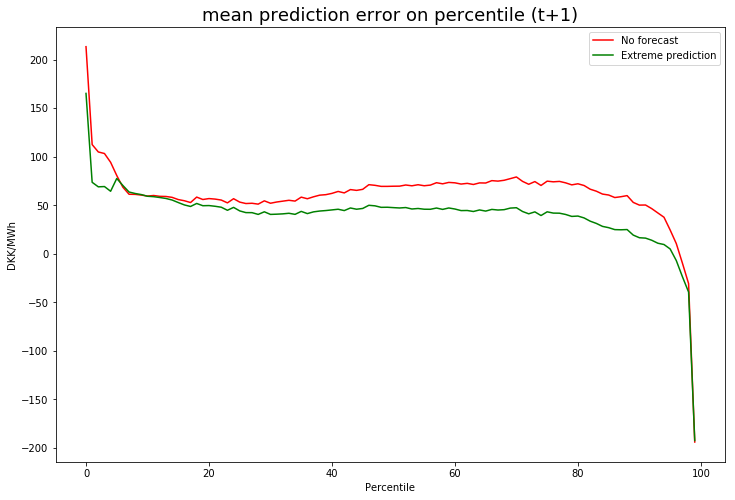

In [56]:
plt.figure(figsize=(12, 8))
plt.plot(error_df1, color='red', label='No forecast')
plt.plot(error_df2, color='green', label='Extreme prediction')
plt.title('mean prediction error on percentile (t+1)',  fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_1.png')
plt.show()

In [57]:
error_dict_1no_abs = {}
for perc in range(100):
    error_dict_1no_abs[perc] = error_df[30:]['1_no_abs'][error_df['price_bin_1'] == perc].mean()

In [58]:
error_dict_1pred_abs = {}
for perc in range(100):
    error_dict_1pred_abs[perc] = error_df[30:]['1_pred_abs'][error_df['price_bin_1'] == perc].mean()

In [59]:
error_df3 = pd.DataFrame.from_dict(error_dict_1no_abs, orient='index')
error_df4 = pd.DataFrame.from_dict(error_dict_1pred_abs, orient='index')

In [61]:
filehandler = open('lstm_no.pkl', 'wb')
pickle.dump(error_df3, filehandler)

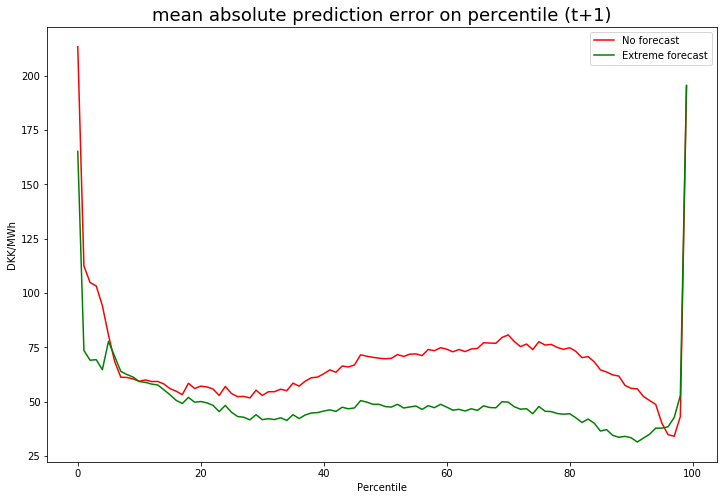

In [62]:
plt.figure(figsize=(12, 8))
plt.plot(error_df3, color='red', label='No forecast')
plt.plot(error_df4, color='green', label='Extreme forecast')
plt.title('mean absolute prediction error on percentile (t+1)',  fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_1_abs.png')
plt.show()

## t+24

In [63]:
error_dict_24no = {}
for perc in range(100):
    error_dict_24no[perc] = error_df[30:]['24_no'][error_df['price_bin_24'] == perc].mean()

In [64]:
error_dict_24pred = {}
for perc in range(100):
    error_dict_24pred[perc] = error_df[30:]['24_pred'][error_df['price_bin_24'] == perc].mean()

In [65]:
error_df5 = pd.DataFrame.from_dict(error_dict_24no, orient='index')
error_df6 = pd.DataFrame.from_dict(error_dict_24pred, orient='index')

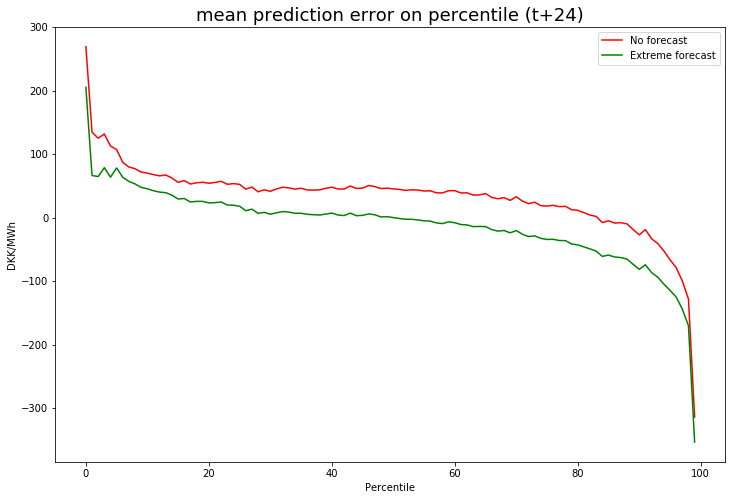

In [66]:
plt.figure(figsize=(12, 8))
plt.plot(error_df5, color='red', label='No forecast')
plt.plot(error_df6, color='green', label='Extreme forecast')
plt.title('mean prediction error on percentile (t+24)', fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_24.png')

plt.show()

In [67]:
error_dict_24no_abs = {}
for perc in range(100):
    error_dict_24no_abs[perc] = error_df[30:]['24_no_abs'][error_df['price_bin_24'] == perc].mean()

In [68]:
error_dict_24pred_abs = {}
for perc in range(100):
    error_dict_24pred_abs[perc] = error_df[30:]['24_pred_abs'][error_df['price_bin_24'] == perc].mean()

In [69]:
error_df7 = pd.DataFrame.from_dict(error_dict_24no_abs, orient='index')
error_df8 = pd.DataFrame.from_dict(error_dict_24pred_abs, orient='index')

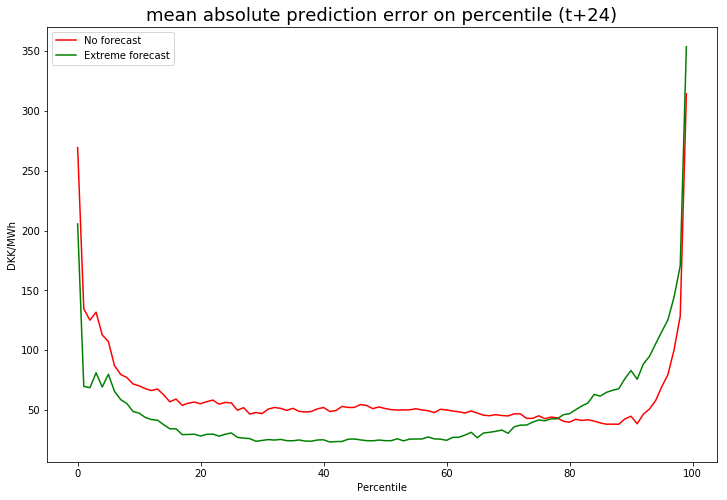

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(error_df7, color='red', label='No forecast')
plt.plot(error_df8, color='green', label='Extreme forecast')
plt.title('mean absolute prediction error on percentile (t+24)',  fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_24_abs.png')

plt.show()

## t+48

In [71]:
error_dict_48no = {}
for perc in range(100):
    error_dict_48no[perc] = error_df[30:]['48_no'][error_df['price_bin_48'] == perc].mean()

In [72]:
error_dict_48pred = {}
for perc in range(100):
    error_dict_48pred[perc] = error_df[30:]['48_pred'][error_df['price_bin_48'] == perc].mean()

In [73]:
error_df9 = pd.DataFrame.from_dict(error_dict_48no, orient='index')
error_df10 = pd.DataFrame.from_dict(error_dict_48pred, orient='index')

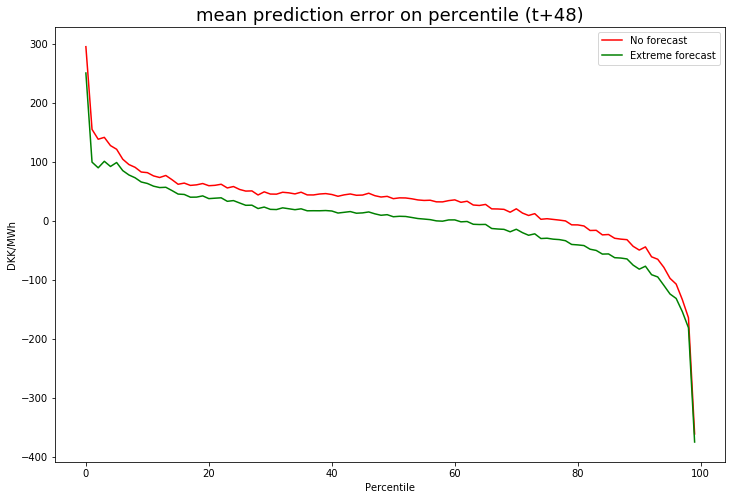

In [74]:
plt.figure(figsize=(12, 8))
plt.plot(error_df9, color='red', label='No forecast')
plt.plot(error_df10, color='green', label='Extreme forecast')
plt.title('mean prediction error on percentile (t+48)',  fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_48.png')
plt.show()

In [75]:
error_dict_48no_abs = {}
for perc in range(100):
    error_dict_48no_abs[perc] = error_df[30:]['48_no_abs'][error_df['price_bin_48'] == perc].mean()

In [76]:
error_dict_48pred_abs = {}
for perc in range(100):
    error_dict_48pred_abs[perc] = error_df[30:]['48_pred_abs'][error_df['price_bin_48'] == perc].mean()

In [77]:
error_df11 = pd.DataFrame.from_dict(error_dict_48no_abs, orient='index')
error_df12 = pd.DataFrame.from_dict(error_dict_48pred_abs, orient='index')

In [80]:
filehandler = open('lstm48_no.pkl', 'wb')
pickle.dump(error_df11, filehandler)

filehandler = open('lstm48_pred.pkl', 'wb')
pickle.dump(error_df12, filehandler)

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(error_df11, color='red', label='No forecast')
plt.plot(error_df12, color='green', label='Extreme forecast')
plt.title('mean absolute prediction error on percentile (t+48)',  fontsize=18)
plt.xlabel('Percentile')
plt.ylabel('DKK/MWh')
plt.legend()
plt.savefig('./pred_error_48_abs.png')
plt.show()

## Naive BM

In [ ]:
target['1d_error'] = target['48_h'] - target['24_h']
target['1d_abs'] = np.abs(target['1d_error'])
target['2d_error'] = target['48_h'].shift(-1) - target['1_h']
target['2d_abs'] = np.abs(target['2d_error'])

In [ ]:
target.describe()